# 9.- Archivos

## 9.2.-Archivos TXT

Lo primero que haremos será escribir a un archivo de texto con información extraordinariamente importante. 

A continuación los 4 influencers con más seguidores en tiktok del mundo (Febrero 2021)

@charlidamelio D’Amelio 108.1
@addisonre Addison 76.4
@zachking Zach 56.6
@bellapoarch Bella 56.3

In [1]:
with open("seguidores.txt",mode="w") as seguidores: #w: write
    seguidores.write("@charlidamelio D’Amelio 108.1\n")
    seguidores.write("@addisonre Addison 76.4\n")
    seguidores.write("@zachking Zach 56.6\n")
    seguidores.write("@bellapoarch Bella 56.3\n")

Ahora revisaremos los contenidos en python con el siguiente código:

In [6]:
with open("seguidores.txt", mode="r") as seguidores: #r = read 
    print(f'{"Handle":<20}{"Nombre":<10}{"num_seg":<10}')
    for record in seguidores:
        handle, nombre, num_seg = record.rsplit(" ",2) # recorre cada registro(cada linea) // separada por espacios
        print(f'{handle:<20}{nombre:<10}{num_seg:<10}')

Handle              Nombre    num_seg   
@charlidamelio      D’Amelio  108.1
    
@addisonre          Addison   76.4
     
@zachking           Zach      56.6
     
@bellapoarch        Bella     56.3
     


Que pasa si queremos modificar el carhivo desde python? Es un problema

In [10]:
seguidores = open("seguidores.txt", "r")
temporal = open("temporal.txt", "w")

with seguidores, temporal:
    for record in seguidores:
        handle, nombre, num_seg = record.split()
        if handle != "@charlidamelio":
            temporal.write(record)
        else:
            new_name = " ".join([handle, "Carlos", num_seg])
            temporal.write(new_name + "\n")

In [11]:
open?

Signature:
open(
    file,
    mode='r',
    buffering=-1,
    encoding=None,
    errors=None,
    newline=None,
    closefd=True,
    opener=None,
)
Docstring:
Open file and return a stream.  Raise OSError upon failure.

file is either a text or byte string giving the name (and the path
if the file isn't in the current working directory) of the file to
be opened or an integer file descriptor of the file to be
wrapped. (If a file descriptor is given, it is closed when the
returned I/O object is closed, unless closefd is set to False.)

mode is an optional string that specifies the mode in which the file
is opened. It defaults to 'r' which means open for reading in text
mode.  Other common values are 'w' for writing (truncating the file if
it already exists), 'x' for creating and writing to a new file, and
'a' for appending (which on some Unix systems, means that all writes
append to the end of the file regardless of the current seek position).
In text mode, if encoding is not specified

## 9.3.- Archivos JSON

Consideremos el siguiente diccionario que habla de tiktok

seguidores_dicc={'seguidores\n':[
 {'handle':'@charlidamelio', 'name':'Charlie', 'num_seg':108.1},
 {'handle':'@addisonre', 'name':'Addison', 'num_seg':76.4},
 {'handle':'@zachking', 'name':'Zach', 'num_seg':56.6},
 {'handle':'@bellapoarch', 'name':'Bella', 'num_seg':56.3}]}


In [12]:
seguidores_dicc={'seguidores\n':[ {'handle':'@charlidamelio', 'name':'Charlie', 'num_seg':108.1}, {'handle':'@addisonre', 'name':'Addison', 'num_seg':76.4}, {'handle':'@zachking', 'name':'Zach', 'num_seg':56.6}, {'handle':'@bellapoarch', 'name':'Bella', 'num_seg':56.3}]}

In [13]:
seguidores_dicc

{'seguidores\n': [{'handle': '@charlidamelio',
   'name': 'Charlie',
   'num_seg': 108.1},
  {'handle': '@addisonre', 'name': 'Addison', 'num_seg': 76.4},
  {'handle': '@zachking', 'name': 'Zach', 'num_seg': 56.6},
  {'handle': '@bellapoarch', 'name': 'Bella', 'num_seg': 56.3}]}

Para escribir este objeto con el formato JSON

In [22]:
import json
with open("seguidores.json","w", encoding="utf-8") as f:
    json.dump(seguidores_dicc, f, ensure_ascii=False,indent=2)

Ahora recuperemos los datos del archivo JSON con la función load

In [23]:
with open("seguidores.json","r", encoding="utf-8") as f:
    seguidores_dicc = json.load(f)
    print(seguidores_dicc)

{'seguidores\n': [{'handle': '@charlidamelio', 'name': 'Charlie', 'num_seg': 108.1}, {'handle': '@addisonre', 'name': 'Addison', 'num_seg': 76.4}, {'handle': '@zachking', 'name': 'Zach', 'num_seg': 56.6}, {'handle': '@bellapoarch', 'name': 'Bella', 'num_seg': 56.3}]}


Ahora accede al diccionario asociada a la llave seguidores

In [24]:
seguidores = seguidores_dicc["seguidores\n"]
print(seguidores)

[{'handle': '@charlidamelio', 'name': 'Charlie', 'num_seg': 108.1}, {'handle': '@addisonre', 'name': 'Addison', 'num_seg': 76.4}, {'handle': '@zachking', 'name': 'Zach', 'num_seg': 56.6}, {'handle': '@bellapoarch', 'name': 'Bella', 'num_seg': 56.3}]


Y obten registros indivudales de 0 y 3

In [26]:
print(seguidores[0])
print(seguidores[3])

{'handle': '@charlidamelio', 'name': 'Charlie', 'num_seg': 108.1}
{'handle': '@bellapoarch', 'name': 'Bella', 'num_seg': 56.3}


## 9.4.- Manipulación de Excepciones

Una excepción es un error, como dividir entre 0

In [27]:
4/0

ZeroDivisionError: division by zero

Y la excepción d etipo value error, que ocurre cuando intentas convertir una cadena en entero

In [30]:
int("hola muy buenas")

ValueError: invalid literal for int() with base 10: 'hola muy buenas'

Que pasa si quiero dar continuidad a la ejecución dle programa?

Vamos a hacer un programa que divida por 0 - vamos a necesitar usar While, trye, except, except y else

In [33]:
while True:
    try:
        numerador=int(input("dame un numerador"))
        denominador=int(input("dame un denominador"))
        cociente = numerador/denominador
    except ValueError:
        print("Escribe dos numeros enteros mamahuevaso\n")
        

    except ZeroDivisionError:
        print("No puedes dividir entre cero mamahuevaso")
        
    else:
        print(f'{numerador:.1f}/{denominador:.1f}={cociente:.1f}')
    break 


dame un numerador 14
dame un denominador 0


No puedes dividir entre cero mamahuevaso


## 9.5.- Archivos CSV

Primero crearemos un archivo CSV con los seguidores de TikTok

In [81]:
import pandas as pd
import csv

In [84]:


with open("Seguidores.csv", mode ="w",newline="", encoding="utf-8") as seguidores:
    writer = csv.writer(seguidores)
    writer.writerow(["@charlidamelio"," D’Amelio", 108.1])
    writer.writerow(["@addisonre"," Addison", 76.4])
    writer.writerow(["@zachking"," Zach", 56.6])
    writer.writerow(["@bellapoarch"," Bella", 56.3])


Ahora leeremos nuestro mismo archivo

In [85]:
with open("seguidores.csv", "r",newline="",encoding="utf-8") as seguidores:
    print(f'{"Handle":<20}{"Nombre":<10}{"num_seg":<10}')
    lectura = csv.reader(seguidores)
    for record in lectura:
        handle, nombre, num_seg = record
        print(f'{handle:<20}{nombre:<10}{num_seg:<10}')

Handle              Nombre    num_seg   
@charlidamelio       D’Amelio 108.1     
@addisonre           Addison  76.4      
@zachking            Zach     56.6      
@bellapoarch         Bella    56.3      


## 9.6.- Lectura de CSV con DataFrame de Pandas

Vamos a leer el archivo del gimnasio

In [44]:
datos_gym_df = pd.read_csv("datos_gimnasio.csv")

In [45]:
datos_gym_df

,codigo_user,Género,Peso,Cintura,Pulso,Lagartijas,Sentadillas,Saltos
0,usuario1,M,86.64,91.44,50,5,162,60
1,usuario2,M,85.73,93.98,52,2,110,60
2,usuario3,M,87.54,96.52,58,12,101,101
3,usuario4,F,73.48,88.90,62,12,105,37
4,usuario5,M,85.73,88.90,46,13,155,58
5,usuario6,F,82.55,91.44,56,4,101,42
6,usuario7,M,95.71,96.52,56,8,101,38
7,usuario8,F,75.75,86.36,60,6,125,40
8,usuario9,F,79.83,78.74,74,15,200,40
9,usuario10,F,69.85,83.82,56,17,251,250


Ahora mostraremos oslo las últimas 5 filas

In [46]:
datos_gym_df.tail() # puedes ponerle 5 pero por defecto saca 5

,codigo_user,Género,Peso,Cintura,Pulso,Lagartijas,Sentadillas,Saltos
15,usuario16,M,91.63,93.98,62,12,210,120
16,usuario17,F,79.83,93.98,54,4,60,25
17,usuario18,M,71.21,81.28,52,11,230,80
18,usuario19,F,70.76,83.82,54,15,225,73
19,usuario20,F,62.60,83.82,68,2,110,43


Vamos a modificar los encabezados del data frame

In [58]:
# no se si se refiere a cambiar el nombre a las columnas, si es asi puedes encontrarlo en el 8.1
datos_gym_df=datos_gym_df.rename(columns={"Lagartijas":"Flexiones"})

In [59]:
datos_gym_df

,codigo_user,Género,Peso,Cintura,Pulso,Flexiones,Sentadillas,Saltos
0,usuario1,M,86.64,91.44,50,5,162,60
1,usuario2,M,85.73,93.98,52,2,110,60
2,usuario3,M,87.54,96.52,58,12,101,101
3,usuario4,F,73.48,88.90,62,12,105,37
4,usuario5,M,85.73,88.90,46,13,155,58
5,usuario6,F,82.55,91.44,56,4,101,42
6,usuario7,M,95.71,96.52,56,8,101,38
7,usuario8,F,75.75,86.36,60,6,125,40
8,usuario9,F,79.83,78.74,74,15,200,40
9,usuario10,F,69.85,83.82,56,17,251,250


Y ahora usamos describe para obtener un resumen de las estadisticas de los datos

In [52]:
datos_gym_df.describe()

,Peso,Cintura,Pulso,Lagartijas,Sentadillas,Saltos
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000
mean,81.011500,89.916000,56.100000,9.450000,145.550000,70.30000
std,11.200197,8.133012,7.210373,5.286278,62.566575,51.27747
min,62.600000,78.740000,46.000000,1.000000,50.000000,25.00000
25%,72.912500,83.820000,51.500000,4.750000,101.000000,39.50000
50%,79.830000,88.900000,55.000000,11.500000,122.500000,54.00000
75%,86.865000,93.980000,60.500000,13.250000,210.000000,85.25000
max,112.040000,116.840000,74.000000,17.000000,251.000000,250.00000


Que tal que solo queremos estadisticas de mujeres? 👩🏻

In [57]:
Genero_F_en_gimnasio = datos_gym_df[datos_gym_df["Género"]=="F"]
Genero_F_en_gimnasio

,codigo_user,Género,Peso,Cintura,Pulso,Lagartijas,Sentadillas,Saltos
3,usuario4,F,73.48,88.90,62,12,105,37
5,usuario6,F,82.55,91.44,56,4,101,42
7,usuario8,F,75.75,86.36,60,6,125,40
8,usuario9,F,79.83,78.74,74,15,200,40
9,usuario10,F,69.85,83.82,56,17,251,250
11,usuario12,F,75.30,83.82,52,13,210,115
12,usuario13,F,69.85,86.36,64,14,215,105
14,usuario15,F,87.54,91.44,46,6,70,31
16,usuario17,F,79.83,93.98,54,4,60,25
18,usuario19,F,70.76,83.82,54,15,225,73


In [60]:
(datos_gym_df.Género == "F").describe()

count       20
unique       2
top       True
freq        11
Name: Género, dtype: object

Hagamos una grafica de los datos del gym 📊

In [61]:
import matplotlib.pyplot as plt

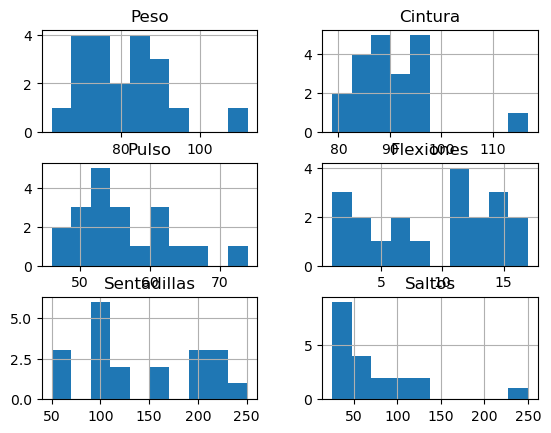

In [62]:
histogram = datos_gym_df.hist()